# Prominence Dynamics - Spectroscopy

In [2]:
import numpy as np
import matplotlib.pyplot as plt
import astropy.io.fits as fits # allows one to access both data and header of FITS files.
from astropy.wcs import WCS # allows to use Wor§ld Coords System
import jupyterlab
import hcr2fits
#from iris_lmsalpy import hcr2fits
import astropy
import json
import matplotlib
import numpy
import requests
import os
import traceback
import PyQt5
import pyqtgraph
import pandas
from sklearn import datasets
from sklearn import preprocessing # for normalisation

NumExpr defaulting to 4 threads.


import sys
!{sys.executable} -m pip install git+git://GitHub.com/OfAaron3/irispreppy.git

In [3]:
from IPython.core.display import display, HTML
display(HTML("<style>.container { width:90% !important; }</style>")) # this makes the Jupyter notbook wider

pip install pyserial

!python -m pip uninstall irispreppy --yes

pip install git+http://github.com/OfAaron3/irispreppy.git

In [4]:
import irispreppy as ip

ModuleNotFoundError: No module named 'irispreppy'

The raster data is saved in HDUs extensions and orgenised by spectral windows.

In [5]:
file_names = ["spectroscopic_data/iris_l2_20140528_112458_3820111493_raster_t000_r00000.fits",
             "spectroscopic_data/iris_l2_20140528_112458_3820111493_raster_t000_r00001.fits",
             "spectroscopic_data/iris_l2_20140528_112458_3820111493_raster_t000_r00002.fits",
             "spectroscopic_data/iris_l2_20140528_112458_3820111493_raster_t000_r00003.fits",
             "spectroscopic_data/iris_l2_20140528_112458_3820111493_raster_t000_r00004.fits",
             "spectroscopic_data/iris_l2_20140528_112458_3820111493_raster_t000_r00005.fits",
             "spectroscopic_data/iris_l2_20140528_112458_3820111493_raster_t000_r00006.fits",
             "spectroscopic_data/iris_l2_20140528_112458_3820111493_raster_t000_r00007.fits",
             "spectroscopic_data/iris_l2_20140528_112458_3820111493_raster_t000_r00008.fits",
             "spectroscopic_data/iris_l2_20140528_112458_3820111493_raster_t000_r00009.fits",
             "spectroscopic_data/iris_l2_20140528_112458_3820111493_raster_t000_r00010.fits",
             "spectroscopic_data/iris_l2_20140528_112458_3820111493_raster_t000_r00011.fits",
             "spectroscopic_data/iris_l2_20140528_112458_3820111493_raster_t000_r00012.fits",
             "spectroscopic_data/iris_l2_20140528_112458_3820111493_raster_t000_r00013.fits",
             "spectroscopic_data/iris_l2_20140528_112458_3820111493_raster_t000_r00014.fits",
             "spectroscopic_data/iris_l2_20140528_112458_3820111493_raster_t000_r00015.fits"]
rasters = []
for i in range(0,16):
    sp = fits.open(file_names[i],
                memmap=False, do_not_scale_image = False) # raster files are largers so memmap is a good idea
    rasters.append(sp)

hd_raster = sp[0].header
#The windows are described by headers:
print(rasters[0][8].data[0][56].shape)

(268,)


raw = fits.open("iris_l2_20140528_112458_3820111493_raster_t000_r00000.fits") #Raw data
rc = ip.radcal(raw, quiet= False)
#rc = ip.radcal(rasters[0])  #Radiometrically calibrated
rc_d = ip.deconvolve(raw)   #Radiometrically calibrated and deconvolved

**Raster data information:** Very large sparse 64-step raster  
    FOV:   63"x175"  
    Steps:	64x1"  
    Step Cad:	16.2s  
    Raster Cad:	1,038s, 16 ras (time it takes for 1 raster to be completed)

hd_raster['OBS_DESC']The number of spectral windows equals the number of FITS units minus three (metadata).  


In [6]:
print(len(sp))
print(hd_raster['NWIN'])
#print(hd_raster)
print(hd_raster['FOVY'],hd_raster['FOVX'])


print('Window. Name      : wave start - wave end\n')
for i in range(hd_raster['NWIN']):
    win = str(i + 1)
    print('{0}. {1:15}: {2:.2f} - {3:.2f} Å'
          ''.format(win, hd_raster['TDESC' + win], hd_raster['TWMIN' + win], hd_raster['TWMAX' + win]))

11
8
182.32 63.396068573
Window. Name      : wave start - wave end

1. C II 1336      : 1332.70 - 1337.58 Å
2. Fe XII 1349    : 1347.68 - 1350.87 Å
3. O I 1356       : 1352.25 - 1356.69 Å
4. Si IV 1394     : 1390.90 - 1396.19 Å
5. Si IV 1403     : 1398.63 - 1406.34 Å
6. 2832           : 2831.24 - 2834.24 Å
7. 2814           : 2812.55 - 2816.37 Å
8. Mg II k 2796   : 2793.00 - 2806.59 Å


The data has **shape**:  
- raster postition (or time if sit and stare)(i.e. step in raster)  
- y coordinate (space along slit),  
- and the last axis is the wavelength (plotted along x axis)

In [7]:
rasters[5][8].data.shape 
#plt.imshow(rasters[5][8].data[63])
#plt.show()

(64, 548, 268)

In [8]:
rasters[5][8].data.shape # accesses 8th window of 5th raster

wcs_raster = WCS(rasters[8][8].header) # convert from pixels to WCS
m_to_nm = 1e9  # convert wavelength to nm
nwave = rasters[8][8].data.shape[2]
wavelength = wcs_raster.all_pix2world(np.arange(nwave), [0.], [0.], 0)[0] * m_to_nm

t_rasters = ['11:24 - 11:42', '11:42 - 11:59', '12:00-12:17', '12:17 - 12:34', '12:35 - 12 :51', '12:52 - 13:08', '13:08 - 13:26', '13:26 - 13:43','13:43 - 14:00', '14:00 - 14:17', '14:17 - 14:34', '14:34 - 14:52', '14:52  -15:10', '15:10 - 15:27', '15:27 - 15:44', '15:44 - 16:01']
print(len(t_rasters))

16


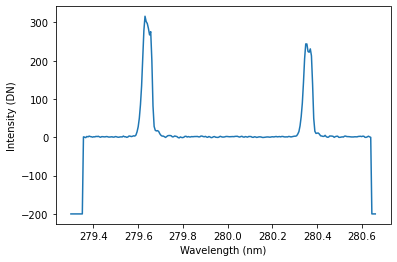

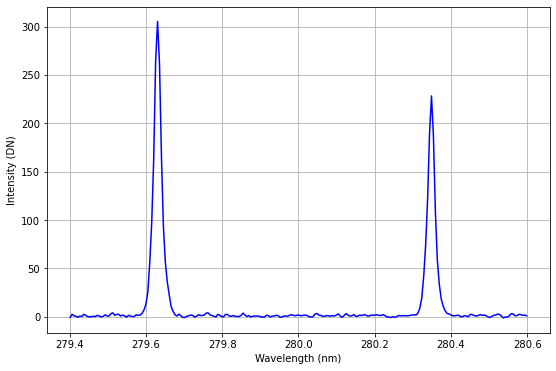

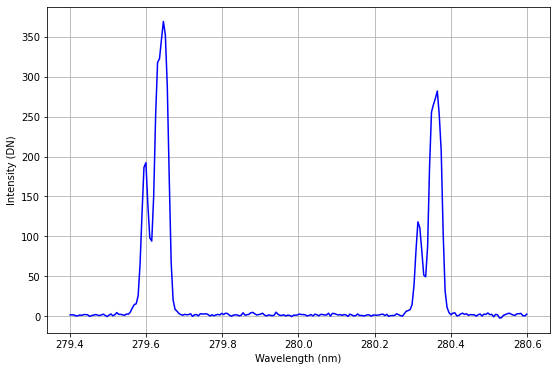

In [9]:
plt.plot(wavelength, rasters[5][8].data[53, 120]) # choose the step and then the y position of the pixel alog that step? you want to plot
plt.xlabel("Wavelength (nm)")
plt.ylabel("Intensity (DN)")
plt.show()

plt.figure(figsize=(9,6))
plt.plot(wavelength[20:256], rasters[5][8].data[63, 180, 20:256], color='b') # choose the step and then the y position of the pixel alog that step? you want to plot
plt.xlabel("Wavelength (nm)")
plt.ylabel("Intensity (DN)")
plt.grid()
plt.show()

plt.figure(figsize=(9,6))
plt.plot(wavelength[20:256], rasters[5][8].data[25, 149, 20:256], color='b') # choose the step and then the y position of the pixel alog that step? you want to plot
plt.xlabel("Wavelength (nm)")
plt.ylabel("Intensity (DN)")
plt.grid()
plt.show()

Spectroheliogram: we can plot an image of the sun at a fixed wavelength position. This is possible because the IRIS moves and creates a raster.

279.63578165668554 66


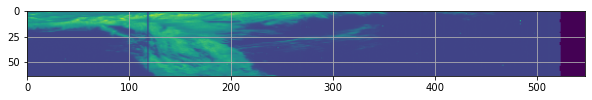

In [10]:
mg_index = np.argmin(np.abs(wavelength - 279.6351)) # 279.6351 nm is the line core of the Mg II k line
print(wavelength[mg_index], mg_index)
#mg_index = np.argmin(np.abs(wavelength - 280.2704))
# the above code finds the waveleght closest to the line core
plt.figure(figsize=[10,8])
plt.imshow(rasters[5][8].data[..., mg_index], vmin=-200, vmax=800)
plt.grid()
plt.show()

### Applying the Quantile Method

Steps:
- Normalise intensity profiles
- Calculate Cumulative Distribution Function (CDF) of the normalised intensity profile  
- The line centre is then given by the wavelength position of the 50% level of the CDF [Ruan2018]

#### 1 - Normalising instensity profiles:

In [11]:
# normalize the data 

from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()

data = rasters[5][8].data[63, 200].reshape(-1, 1)
print(scaler.fit(data))
scaled_data = scaler.transform(data).flatten()
#print(scaled_data)
#normalized = preprocessing.normalize(rasters[5][8].data[63, 200])
#print(rasters[5][8].data.shape[1])

MinMaxScaler()


For all data:

In [12]:
# DATA NORMALISED SO THAT INTENSITIES ARE BETWEEN 0 and 1

from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()

n_rasters = 16
n_steps = 64
n_ypixels = 548

S_DATA = []
for k in range(0,n_rasters): # for every raster k
    SCALED_RASTERS = []
    for i in range(0, n_steps):  
        scaled_step = []
        for j in range(0, n_ypixels-28): # rescaling every pixel j of a step i
            #for w in range(0, 268):
               # if rasters[k][8].data[i, j, w] < 0:  # or Nah
                 #   rasters[k][8].data[i, j, w] = 0
            d = rasters[k][8].data[i, j, 20:250]#.reshape(-1, 1)  # CHANGE WAVELENGTH RANGE
            #scaler.fit(d)
            #scaled = np.array(scaler.transform(d).flatten())
            scaled_step.append(d) # from scaled to d
        SCALED_RASTERS.append(scaled_step)
    S_DATA.append(np.array(SCALED_RASTERS))

S_DATA = np.array(S_DATA)
S_DATA.shape

(16, 64, 520, 230)

In [13]:
# CHANGE OF WAVELENGTH RANGE

wavelength = wavelength[20:250]
core_k = 279.5528 #nm
core_h = 280.2704 #nm
print(wavelength[0], wavelength[-1])
print(core_k - wavelength[0])

width = 0.130 #nm

#ll_k = np.argmin(np.abs(wavelength - (core_k - width)))
#ul_k = np.argmin(np.abs(wavelength - (core_k + width)))

#ll_h = np.argmin(np.abs(wavelength - (core_h - width)))
#ul_h = np.argmin(np.abs(wavelength - (core_h + width)))

#wrange_k = wavelength[ll_k:ul_k]
#wrange_h = wavelength[ll_h:ul_h]

#print(wrange_k[0], wrange_k[-1])
#print(wrange_h[0], wrange_h[-1])

279.4015496638744 280.5676176280863
0.15125033612559946


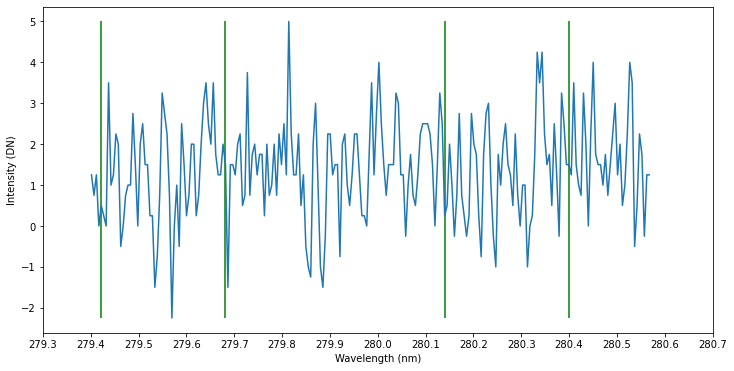

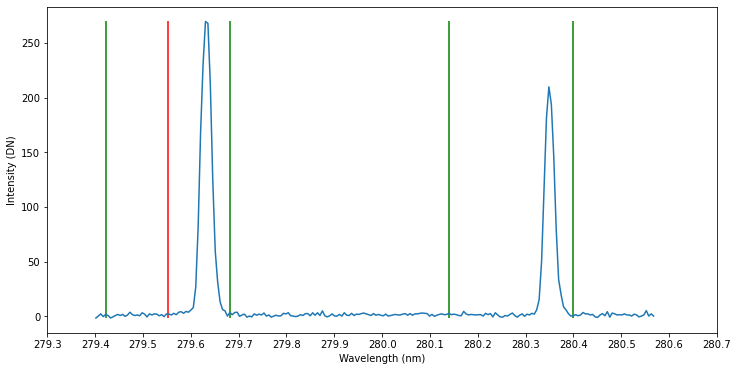

In [14]:
# This is to check that the position of the data within the S_DATA array is correct.

plt.figure(figsize=[12,6])
plt.plot(wavelength, S_DATA[5][53][20])#SCALED_RASTERS[63][200]) # choose the step and then the y position of the pixel alog that step? you want to plot # WAVELENGTH RANGE
plt.vlines(x = wavelength[np.argmin(np.abs(wavelength - (core_k - width)))], ymin=S_DATA[5][53][20].min(), ymax= S_DATA[5][53][20].max(), color = 'g')
plt.vlines(x = wavelength[np.argmin(np.abs(wavelength - (core_k + width)))], ymin=S_DATA[5][53][20].min(), ymax= S_DATA[5][53][20].max(), color = 'g')
plt.vlines(x = wavelength[np.argmin(np.abs(wavelength - (core_h - width)))], ymin=S_DATA[5][53][20].min(), ymax= S_DATA[5][53][20].max(), color = 'g')
plt.vlines(x = wavelength[np.argmin(np.abs(wavelength - (core_h + width)))], ymin=S_DATA[5][53][20].min(), ymax= S_DATA[5][53][20].max(), color = 'g')
#plt.ylim(0,1)
plt.xticks(np.arange(279.3,280.8,0.1))
plt.xlabel("Wavelength (nm)")
plt.ylabel("Intensity (DN)")
plt.show()

plt.figure(figsize=[12,6])
plt.plot(wavelength, S_DATA[5][53][200])#SCALED_RASTERS[63][200]) # choose the step and then the y position of the pixel alog that step? you want to plot # WAVELENGTH RANGE
plt.vlines(x = wavelength[np.argmin(np.abs(wavelength - (core_k - width)))], ymin=S_DATA[5][53][200].min(), ymax= S_DATA[5][53][200].max(), color = 'g')
plt.vlines(x = wavelength[np.argmin(np.abs(wavelength - (core_k + width)))], ymin=S_DATA[5][53][200].min(), ymax= S_DATA[5][53][200].max(), color = 'g')
plt.vlines(x = wavelength[np.argmin(np.abs(wavelength - (core_h - width)))], ymin=S_DATA[5][53][200].min(), ymax= S_DATA[5][53][200].max(), color = 'g')
plt.vlines(x = wavelength[np.argmin(np.abs(wavelength - (core_h + width)))], ymin=S_DATA[5][53][200].min(), ymax= S_DATA[5][53][200].max(), color = 'g')
plt.vlines(x = core_k, ymin=S_DATA[5][53][200].min(), ymax= S_DATA[5][53][200].max(), color = 'r')
plt.xticks(np.arange(279.3,280.8,0.1))
#plt.ylim(0,1)
plt.xlabel("Wavelength (nm)")
plt.ylabel("Intensity (DN)")
plt.show()

#### Finding a reference wavelength:

To calculate the redshift we need to find a reference wavelength from the quiet Sun.

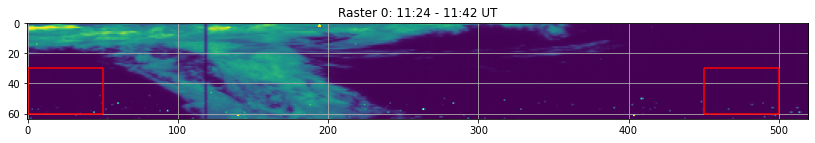

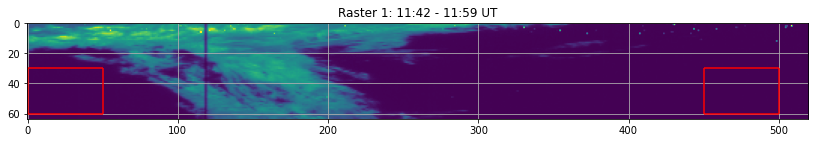

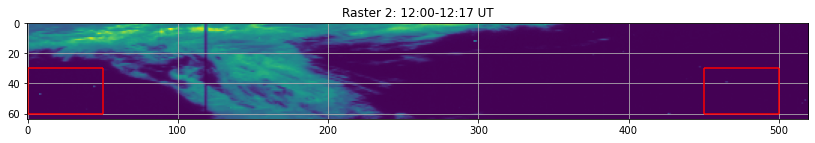

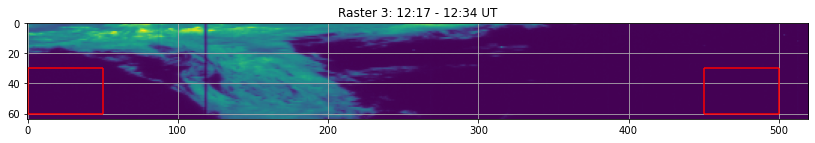

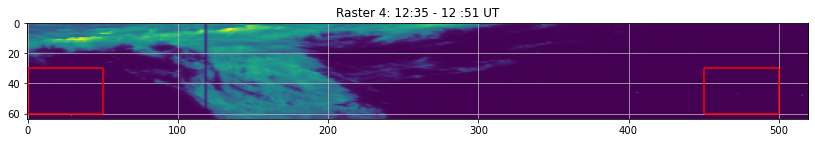

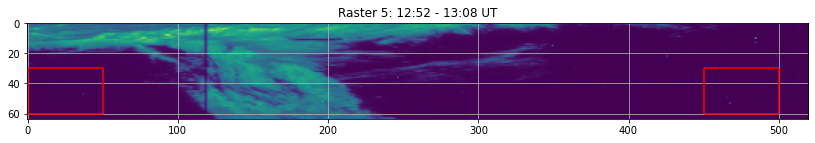

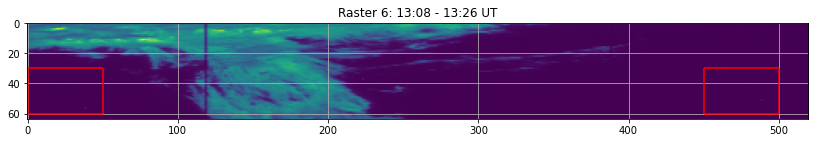

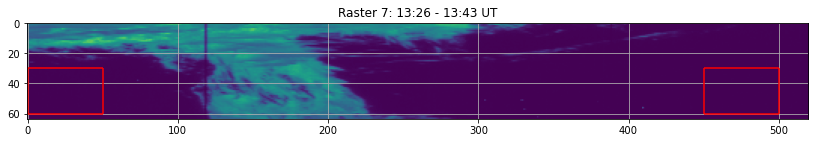

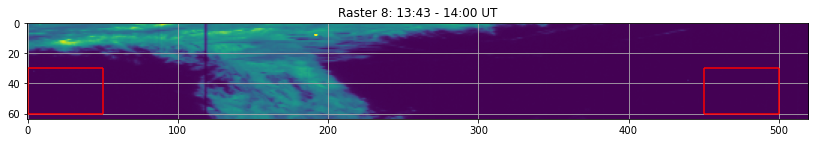

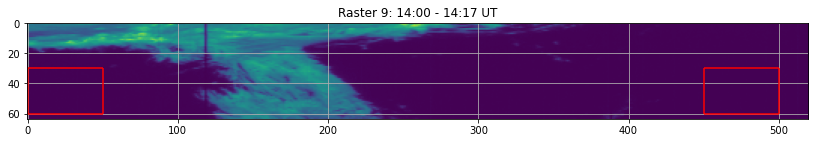

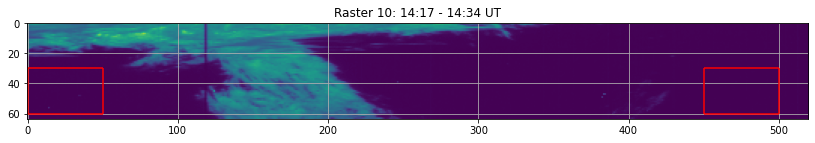

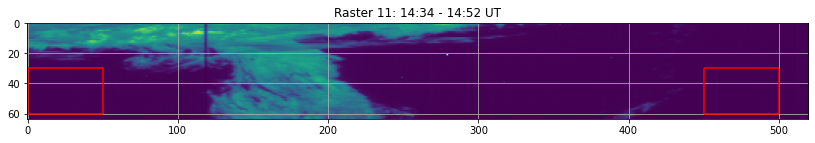

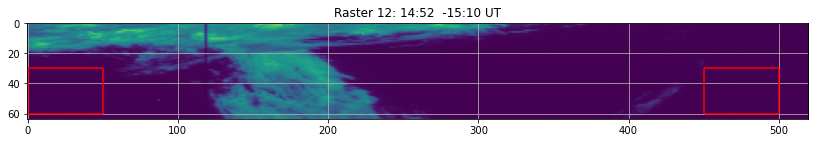

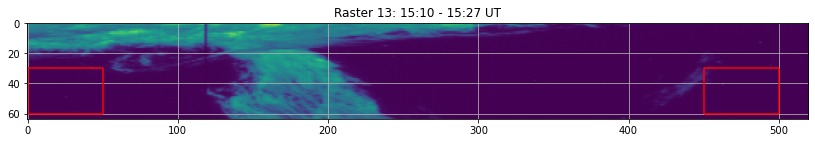

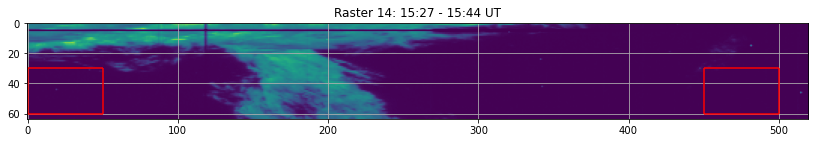

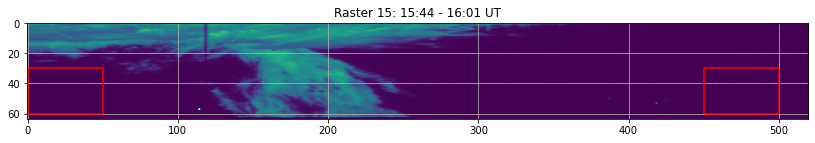

In [15]:
for i in range(0,n_rasters):
    plt.figure(figsize=[14,4])
    plt.imshow(S_DATA[i, :, :, mg_index-20], vmin=0, vmax=800) #np.argmin(np.abs(wrange_k - core_k))])
    plt.title('Raster {0}: {1} UT'.format(i, t_rasters[i]))
    #plt.imshow(scipy.ndimage.rotate(S_DATA[1, :, :,np.argmin(np.abs(wrange_k - core_k)) ],90))

    # Quiet region 1
    plt.hlines(y= 30, xmin=450, xmax= 500, color='r')
    plt.hlines(y= 60, xmin=450, xmax= 500, color='r')
    plt.vlines(x= 450, ymin=30, ymax=60, color='r')
    plt.vlines(x= 500, ymin=30, ymax=60, color='r')
    # Quiet region 2
    plt.hlines(y= 30, xmin=0, xmax= 50, color='r')
    plt.hlines(y= 60, xmin=0, xmax= 50, color='r')
    plt.vlines(x= 0, ymin=30, ymax=60, color='r')
    plt.vlines(x= 50, ymin=30, ymax=60, color='r')
    plt.grid()
    plt.show()

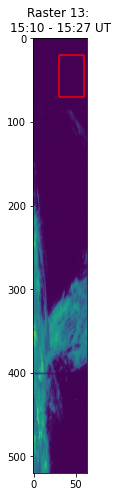

In [16]:
plt.figure(figsize=[8,8])
plt.imshow(np.rot90(S_DATA[12, :, :, mg_index-20]), vmin=0, vmax=800) #np.argmin(np.abs(wrange_k - core_k))])
plt.title('Raster {0}: \n{1} UT'.format(13, t_rasters[13]))
#plt.colorbar()
plt.hlines(y= 70, xmin=30, xmax= 60, color='r')
plt.hlines(y= 20, xmin=30, xmax= 60, color='r')
plt.vlines(x= 30, ymin=70, ymax=20, color='r')
plt.vlines(x= 60, ymin=70, ymax=20, color='r')
plt.show()

32


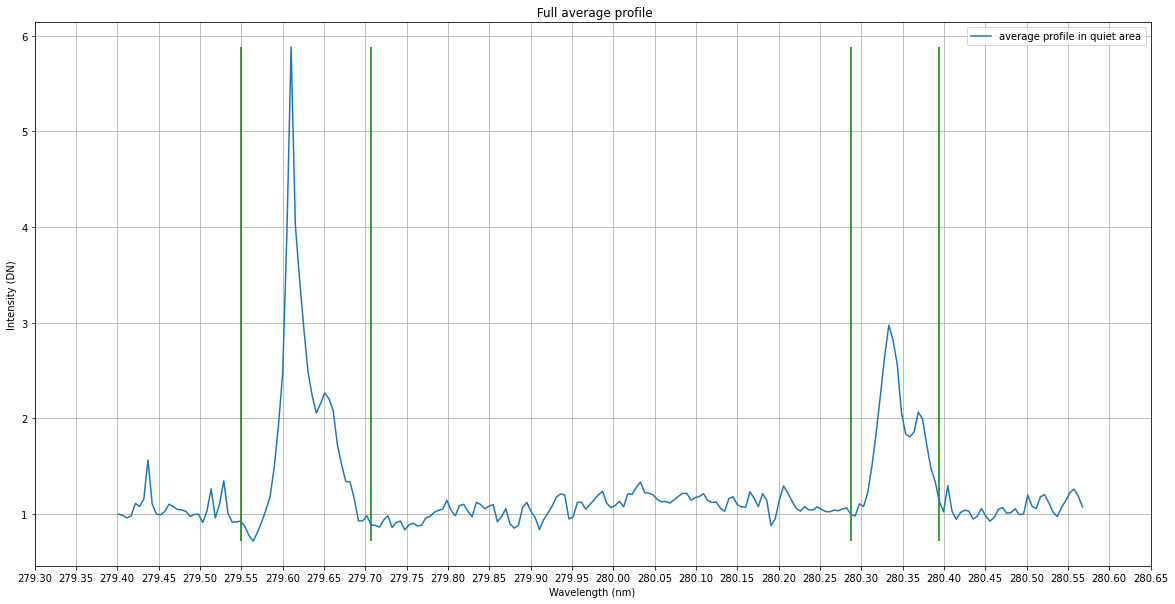

In [17]:
pixel = np.full(len(wavelength), 0) # we want an 'empty pixel' where we can sum all the intensity values
for i in range(1,S_DATA.shape[0]):
    for k in range(30,60): # we want pixels from step 30 to step 60
        for j in range(300,350): # Q1 (450,500)  Q2 (0,50)
            pixel = pixel + S_DATA[i,k,j]
            
#CS_r = np.cumsum(pixel, axis=0) # array containing cumulative sum all all intensity values in pixel
#total_r = pixel.sum() # sum all all intensity values in pixel
#w_index =  np.argmin(np.abs(CS_r/total_r - 0.50)) # index of wavelength at which we find 0.5 quantile

#rest_wavelength = wavelength[w_index]
#REF_WAVELENGTH = np.full((S_DATA.shape[0], S_DATA.shape[1], S_DATA.shape[2]), rest_wavelength) # array with same shape as linecore data but filled only with rest wavelength

# ranges of wavalength around core
wrange_k = wavelength[np.argmin(np.abs(wavelength - 279.55)):np.argmin(np.abs(wavelength - 279.71))] 
wrange_h = wavelength[np.argmin(np.abs(wavelength - 280.29)):np.argmin(np.abs(wavelength - 280.40))]

print(len(wrange_k))

plt.figure(figsize=[20,10])
pixel = pixel/(15*30*50) # intensities divided by number of pixels we averaged          
plt.plot(wavelength, pixel,label = 'average profile in quiet area')
#plt.vlines(x=rest_wavelength, ymin=pixel[10:-10].min(),ymax=pixel[10:-10].max(), color='r', label = 'rest wavelength for k line')
plt.vlines(x=wrange_k[0], ymin=pixel[10:-10].min(),ymax=pixel[10:-10].max(), color='g')
plt.vlines(x=wrange_k[-1], ymin=pixel[10:-10].min(),ymax=pixel[10:-10].max(), color='g')
plt.vlines(x=wrange_h[0], ymin=pixel[10:-10].min(),ymax=pixel[10:-10].max(), color='g')
plt.vlines(x=wrange_h[-1], ymin=pixel[10:-10].min(),ymax=pixel[10:-10].max(), color='g')
plt.title(' Full average profile')
plt.xlabel("Wavelength (nm)")
plt.ylabel("Intensity (DN)")
plt.xticks(np.arange(int(wavelength[0])+0.3, int(wavelength[-1])+0.7, 0.05))
plt.legend()
plt.grid()
plt.show()

for the **k line**:

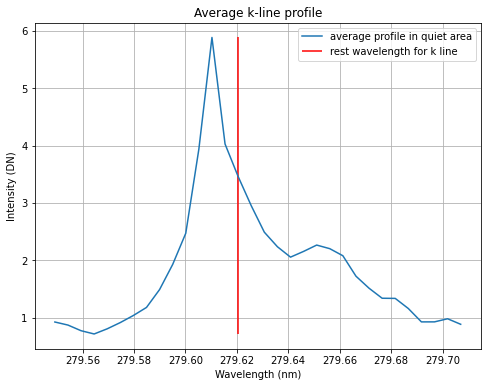

The rest wavelength individuated for the Mg II k line is 279.62050565715435 nm


In [18]:
pixel_k = pixel[np.argmin(np.abs(wavelength - 279.55)):np.argmin(np.abs(wavelength - 279.71))]   
CS_r_k = np.cumsum(pixel_k) # array containing cumulative sum all all intensity values in pixel
total_r_k = CS_r_k[-1] #pixel_k.sum() # sum all all intensity values in pixel
rest_wavelength_k = wrange_k[np.argmin(np.abs(CS_r_k/total_r_k - 0.50))]
REF_WAVELENGTH_k = np.full((S_DATA.shape[0], S_DATA.shape[1], S_DATA.shape[2]), rest_wavelength_k) # array with same shape as linecore data but filled only with rest wavelength

#print(rest_wavelength_k)
#print(CS_r_k/total_r_k)

plt.figure(figsize=[8,6])
# intensities divided by number of pixels we averaged          
plt.plot(wrange_k, pixel_k, label = 'average profile in quiet area')
plt.vlines(x=rest_wavelength_k, ymin=pixel_k.min(), ymax=pixel_k.max(), color='r', label = 'rest wavelength for k line')
plt.title('Average k-line profile')
plt.xlabel("Wavelength (nm)")
plt.ylabel("Intensity (DN)")
plt.legend()
plt.grid()
plt.show()

print('The rest wavelength individuated for the Mg II k line is {0} nm'.format(rest_wavelength_k))

for the **h line**:

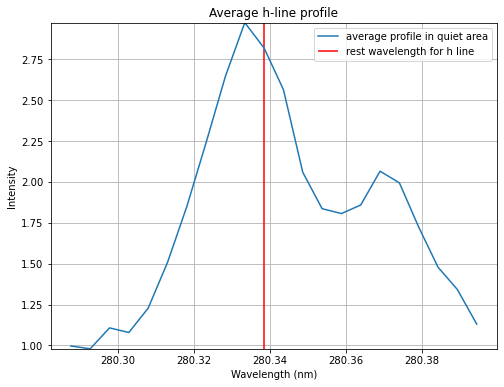

The rest wavelength individuated for the Mg II h line is 280.33847763511886 nm


In [19]:
pixel_h = pixel[np.argmin(np.abs(wavelength - 280.29)) :np.argmin(np.abs(wavelength - 280.40))]
#print(pixel_h)
CS_r_h = np.cumsum(pixel_h) # array containing cumulative sum all all intensity values in pixel
total_r_h = CS_r_h[-1] #pixel_k.sum() # sum all all intensity values in pixel
rest_wavelength_h = wrange_h[np.argmin(np.abs(CS_r_h/total_r_h - 0.50))]
REF_WAVELENGTH_h = np.full((S_DATA.shape[0], S_DATA.shape[1], S_DATA.shape[2]), rest_wavelength_h) # array with same shape as linecore data but filled only with rest wavelength

#print(rest_wavelength_h)
#print(CS_r_h/total_r_h)
#print(len(wrange_h), np.argmin(np.abs(CS_r_h/total_r_h - 0.50)))

plt.figure(figsize=[8,6])
# intensities divided by number of pixels we averaged          
plt.plot(wrange_h, pixel_h, label = 'average profile in quiet area')
plt.vlines(x=rest_wavelength_h, ymin=pixel_h.min(),ymax=pixel_h.max(), color='r', label = 'rest wavelength for h line')
plt.title('Average h-line profile')
plt.ylim(pixel_h.min(), pixel_h.max())
plt.xlabel("Wavelength (nm)")
plt.ylabel("Intensity")
plt.legend()
plt.grid()
plt.show()

print('The rest wavelength individuated for the Mg II h line is {0} nm'.format(rest_wavelength_h))

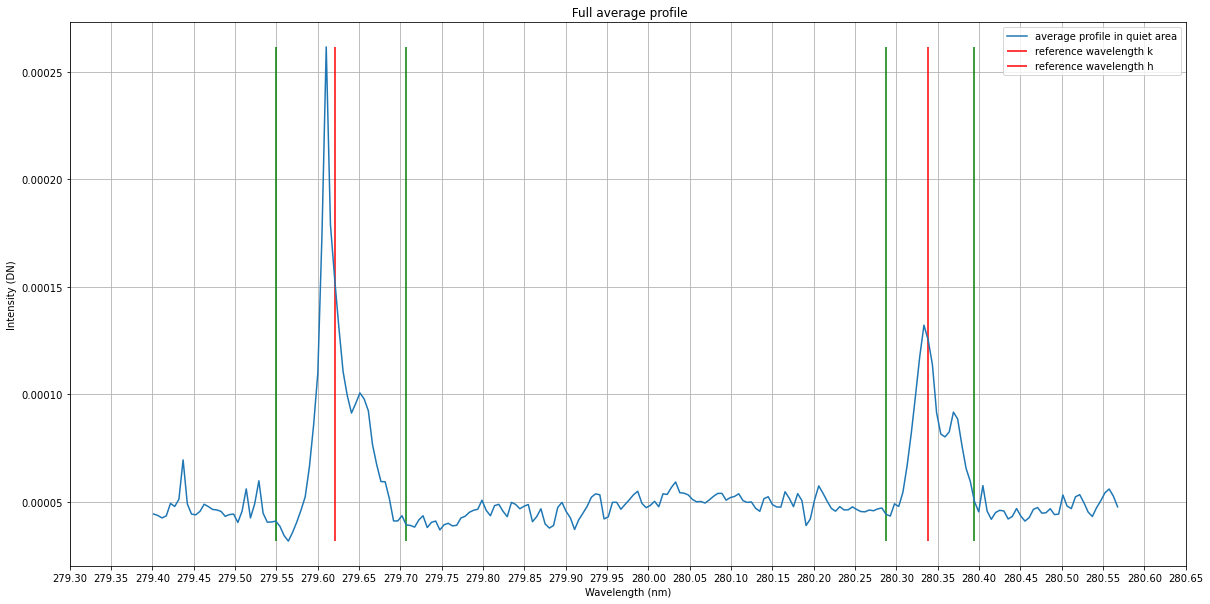

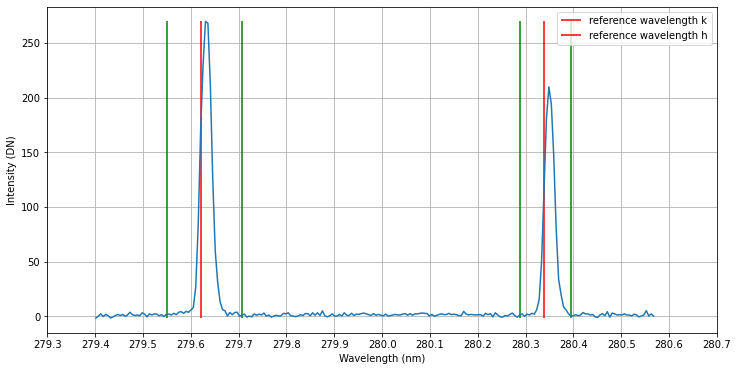

In [20]:
plt.figure(figsize=[20,10])
pixel = pixel/(15*30*50) # intensities divided by number of pixels we averaged          
plt.plot(wavelength, pixel,label = 'average profile in quiet area')
#plt.vlines(x=rest_wavelength, ymin=pixel[10:-10].min(),ymax=pixel[10:-10].max(), color='r', label = 'rest wavelength for k line')
plt.vlines(x=wrange_k[0], ymin=pixel[10:-10].min(),ymax=pixel[10:-10].max(), color='g')
plt.vlines(x=wrange_k[-1], ymin=pixel[10:-10].min(),ymax=pixel[10:-10].max(), color='g')
plt.vlines(x=wrange_h[0], ymin=pixel[10:-10].min(),ymax=pixel[10:-10].max(), color='g')
plt.vlines(x=wrange_h[-1], ymin=pixel[10:-10].min(),ymax=pixel[10:-10].max(), color='g')
plt.vlines(x = rest_wavelength_k, ymin=pixel[10:-10].min(), ymax=pixel[10:-10].max(), color = 'r', label='reference wavelength k')
plt.vlines(x = rest_wavelength_h, ymin=pixel[10:-10].min(), ymax=pixel[10:-10].max(), color = 'r', label='reference wavelength h')
plt.title(' Full average profile')
plt.xlabel("Wavelength (nm)")
plt.ylabel("Intensity (DN)")
plt.xticks(np.arange(int(wavelength[0])+0.3, int(wavelength[-1])+0.7, 0.05))
plt.legend()
plt.grid()
plt.show()


plt.figure(figsize=[12,6])
plt.plot(wavelength, S_DATA[5][53][200])#SCALED_RASTERS[63][200]) # choose the step and then the y position of the pixel alog that step? you want to plot # WAVELENGTH RANGE
plt.vlines(x = wrange_k[0], ymin=S_DATA[5][53][200].min(), ymax= S_DATA[5][53][200].max(), color = 'g')
plt.vlines(x = wrange_k[-1], ymin=S_DATA[5][53][200].min(), ymax= S_DATA[5][53][200].max(), color = 'g')
plt.vlines(x = wrange_h[0], ymin=S_DATA[5][53][200].min(), ymax= S_DATA[5][53][200].max(), color = 'g')
plt.vlines(x = wrange_h[-1], ymin=S_DATA[5][53][200].min(), ymax= S_DATA[5][53][200].max(), color = 'g')
plt.vlines(x = rest_wavelength_k, ymin=S_DATA[5][53][200].min(), ymax= S_DATA[5][53][200].max(), color = 'r', label='reference wavelength k')
plt.vlines(x = rest_wavelength_h, ymin=S_DATA[5][53][200].min(), ymax= S_DATA[5][53][200].max(), color = 'r', label='reference wavelength h')
plt.xticks(np.arange(279.3,280.8,0.1))
plt.xticks(np.arange(279.3,280.8,0.1))
plt.xlabel("Wavelength (nm)")
plt.ylabel("Intensity (DN)")
plt.legend()
plt.grid()
plt.show()

#### Finding the linecore:

The linecores need to be found separately!!  
The linecore is found at the wavelength at which the cumulative distribution function value is 0.5.  
The cumulative sum of the intensities is calculated and then divided by the total sum. Then the difference between this ratio and 0.5 is found for each wavelength. The linecore is chosen when this different is the smallest.

**k line**:

In [21]:
# Here the linecore is calculated for every pixel of every raster: 

width = 0.050
ll_k = np.argmin(np.abs(wavelength - (rest_wavelength_k - width)))
ul_k = np.argmin(np.abs(wavelength - (rest_wavelength_k + width)))
w_k = wavelength[ll_k:ul_k]

LINECORES_k = []
for k in range(0,S_DATA.shape[0]): # for each raster
    linecores_r_k = []
    for i in range(0, S_DATA.shape[1]): #for each step in a raster
        linecores_step_k = []
        for j in range(0, S_DATA.shape[2]): # for every pixel j of a step i
            CS_k = np.cumsum(S_DATA[k,i,j,ll_k:ul_k])
            total_k = S_DATA[k,i,j,ll_k:ul_k].sum()
            if total_k == 0:
                linecores_step_k.append('nan') #'error')
            else:
                #w_index = np.argmin(np.abs(CS_k/total_k - 0.50)) # index of wavelength corresponding to 0.5 quantile
                linecores_step_k.append(w_k[np.argmin(np.abs(CS_k/total_k - 0.50))]) # or wavelength? by putting the wrong array here we get the wrong line core value!
        linecores_r_k.append(linecores_step_k)
    LINECORES_k.append(np.array(linecores_r_k))

LINECORES_k = np.array(LINECORES_k).astype('float')
print(LINECORES_k.shape)

(16, 64, 520)


**h line**:

In [22]:
# Here the linecore is calculated for every pixel of every raster:

ll_h = np.argmin(np.abs(wavelength - (rest_wavelength_h - width)))
ul_h = np.argmin(np.abs(wavelength - (rest_wavelength_h + width)))
w_h = wavelength[ll_h:ul_h]

LINECORES_h = []
for k in range(0,S_DATA.shape[0]): # for each raster
    linecores_r_h = []
    for i in range(0, S_DATA.shape[1]): #for each step in a raster
        linecores_step_h = []
        for j in range(0, S_DATA.shape[2]): # for every pixel j of a step i
            CS_h = np.cumsum(S_DATA[k,i,j,ll_h:ul_h], axis= 0)
            total_h = S_DATA[k,i,j,ll_h:ul_h].sum()
            if total_h == 0:
                linecores_step_h.append('nan') #'error')
            else:
                linecores_step_h.append(w_h[np.argmin(np.abs(CS_h/total_h - 0.50))])
        linecores_r_h.append(linecores_step_h)
    LINECORES_h.append(np.array(linecores_r_h))

LINECORES_h = np.array(LINECORES_h).astype('float')
print(LINECORES_h.shape)

(16, 64, 520)


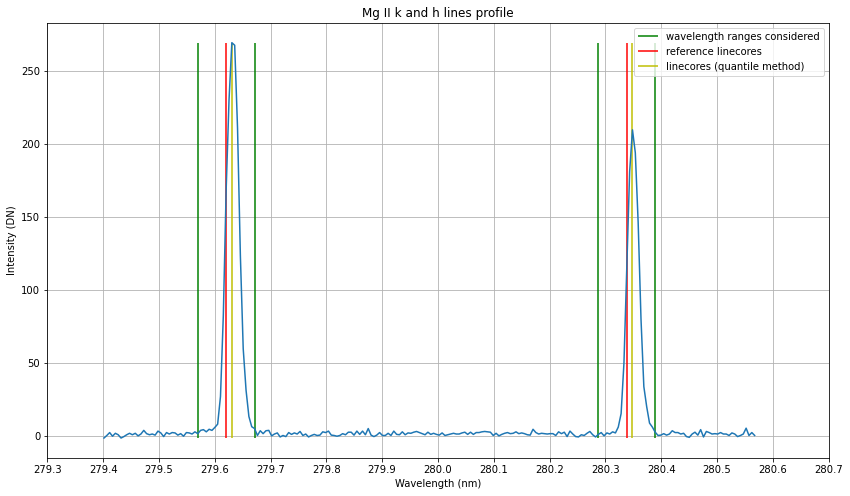

In [23]:
plt.figure(figsize=[14,8])
plt.plot(wavelength, S_DATA[5][53][200])#SCALED_RASTERS[63][200]) # choose the step and then the y position of the pixel alog that step? you want to plot # WAVELENGTH RANGE
plt.vlines(x = wavelength[ll_k], ymin=S_DATA[5][53][200].min(), ymax= S_DATA[5][53][200].max(), color = 'g',label='wavelength ranges considered')
plt.vlines(x = wavelength[ul_k], ymin=S_DATA[5][53][200].min(), ymax= S_DATA[5][53][200].max(), color = 'g')
plt.vlines(x = wavelength[ll_h], ymin=S_DATA[5][53][200].min(), ymax= S_DATA[5][53][200].max(), color = 'g')
plt.vlines(x = wavelength[ul_h], ymin=S_DATA[5][53][200].min(), ymax= S_DATA[5][53][200].max(), color = 'g')
plt.vlines(x = rest_wavelength_k, ymin=S_DATA[5][53][200].min(), ymax= S_DATA[5][53][200].max(), color = 'r' ,label='reference linecores')
plt.vlines(x = rest_wavelength_h, ymin=S_DATA[5][53][200].min(), ymax= S_DATA[5][53][200].max(), color = 'r')
plt.vlines(x = LINECORES_k[5,53,200], ymin=S_DATA[5][53][200].min(), ymax= S_DATA[5][53][200].max(), color = 'y',label='linecores (quantile method)')
plt.vlines(x = LINECORES_h[5,53,200], ymin=S_DATA[5][53][200].min(), ymax= S_DATA[5][53][200].max(), color = 'y')
plt.xticks(np.arange(279.3,280.8,0.1))
plt.xticks(np.arange(279.3,280.8,0.1))
plt.title('Mg II k and h lines profile')
plt.xlabel("Wavelength (nm)")
plt.ylabel("Intensity (DN)")
plt.grid()
plt.legend()
plt.show()

#### Calculating the redshift:

Once the rest wevalength is obtained the redshift can be calculated using the formula {$z = \frac{\lambda_o - \lambda_e}{\lambda_e}$}.

In [24]:
REDSHIFT_k = (LINECORES_k.astype('float') - REF_WAVELENGTH_k.astype('float'))/rest_wavelength_k
REDSHIFT_h = (LINECORES_h.astype('float') - REF_WAVELENGTH_h.astype('float'))/rest_wavelength_h
c = 299792.458 # km/s
V_k = REDSHIFT_k*c
V_h = REDSHIFT_h*c
print(S_DATA.shape)

(16, 64, 520, 230)


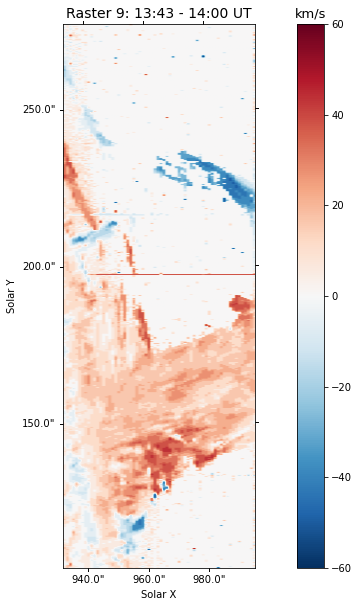

In [25]:
for i in range(0,15):
    for j in range(0,63):
        for k in range(0,V_k.shape[2]):
            int_i = np.trapz(S_DATA[i, j, k], wavelength)
            #print(int_i)
            if int_i < 2:
                if np.abs(V_k[i, j, k])<40:
                    V_k[i,j,k]=0
figure = plt.figure(figsize=(15, 10))
b = np.flipud(np.rot90(V_k[8]))
ax = plt.subplot(projection=wcs_raster.dropaxis(0), slices=('y', 'x'))
ax2 = ax.imshow(b, cmap='RdBu_r', aspect= hd_raster['FOVX']/hd_raster['FOVY'], vmin= -60, vmax= 60)
clb = figure.colorbar(ax2,shrink=1)
clb.set_label('km/s', labelpad = -42, y= 1.03, rotation=0, fontsize=13)
ax.coords[0].set_major_formatter('s.s')
ax.coords[1].set_major_formatter('s.s')
ax.set_xlabel("Solar X")
ax.set_ylabel("Solar Y")
plt.title('Raster {0}: {1} UT'.format(8+1, t_rasters[8]),fontsize=14)
plt.savefig('DopplerK.png', format='png', bbox_inches='tight')
plt.show()


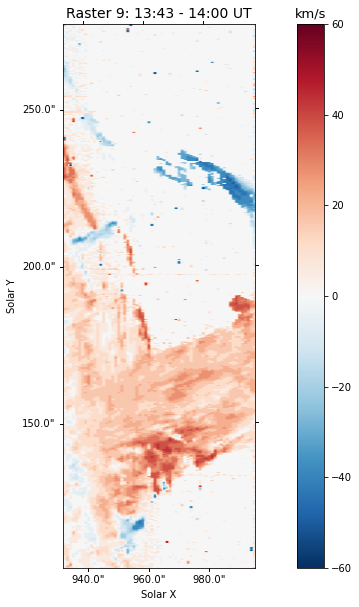

In [28]:
for i in range(0,15):
    for j in range(0,63):
        for k in range(0,V_h.shape[2]):
            int_i = np.trapz(S_DATA[i, j, k], wavelength)
            #print(int_i)
            if int_i < 2:
                if np.abs(V_h[i, j, k])<40:
                    V_h[i,j,k]=0
figure = plt.figure(figsize=(15, 10))
b = np.flipud(np.rot90(V_h[8]))
ax = plt.subplot(projection=wcs_raster.dropaxis(0), slices=('y', 'x'))
ax2 = ax.imshow(b, cmap='RdBu_r', aspect= hd_raster['FOVX']/hd_raster['FOVY'], vmin= -60, vmax= 60)
clb = figure.colorbar(ax2,shrink=1)
clb.set_label('km/s', labelpad = -42, y= 1.03, rotation=0, fontsize=13)
ax.coords[0].set_major_formatter('s.s')
ax.coords[1].set_major_formatter('s.s')
ax.set_xlabel("Solar X")
ax.set_ylabel("Solar Y")
plt.title('Raster {0}: {1} UT'.format(8+1, t_rasters[8]),fontsize=14)
plt.savefig('DopplerH.png', format='png', bbox_inches='tight')
plt.show()


For **k line**:

In [ ]:
for i in range(0,15):
    for j in range(0,63):
        for k in range(0,V_k.shape[2]):
            int_i = np.trapz(S_DATA[i, j, k], wavelength)
            #print(int_i)
            if int_i < 2:
                if np.abs(V_k[i, j, k])<40:
                    V_k[i,j,k]=0
    figure = plt.figure(figsize=(15, 10))
    b = np.flipud(np.rot90(V_k[i]))
    ax = plt.subplot(projection=wcs.dropaxis(0), slices=('y', 'x'))
    ax2 = ax.imshow(b, cmap='RdBu_r', aspect= hd_raster['FOVX']/hd_raster['FOVY'], vmin= -60, vmax= 60)
    clb = figure.colorbar(ax2,shrink=1)
    clb.set_label('km/s', labelpad = -42, y= 1.03, rotation=0, fontsize=13)
    ax.coords[0].set_major_formatter('s.s')
    ax.coords[1].set_major_formatter('s.s')
    ax.set_xlabel("Solar X")
    ax.set_ylabel("Solar Y")
    plt.title('Raster {0}: {1} UT'.format(i+1, t_rasters[i]),fontsize=14)
    plt.show()

For **h_line**:

In [ ]:
for i in range(0,15):
    for j in range(0,63):
        for k in range(0,V_h.shape[2]):
            int_i = np.trapz(S_DATA[i, j, k], wavelength)
            #print(int_i)
            if int_i < 2:
                if np.abs(V_h[i, j, k])<40:
                    V_h[i,j,k]=0
    figure = plt.figure(figsize=(15, 10))
    b = np.flipud(np.rot90(V_h[i]))
    ax = plt.subplot(projection=wcs.dropaxis(0), slices=('y', 'x'))
    ax2 = ax.imshow(b, cmap='RdBu_r', aspect= hd_raster['FOVX']/hd_raster['FOVY'], vmin= -60, vmax= 60)
    clb = figure.colorbar(ax2,shrink=1)
    clb.set_label('km/s', labelpad = -42, y= 1.03, rotation=0, fontsize=13)
    ax.coords[0].set_major_formatter('s.s')
    ax.coords[1].set_major_formatter('s.s')
    ax.set_xlabel("Solar X")
    ax.set_ylabel("Solar Y")
    plt.title('Raster {0}: {1} UT'.format(i, t_rasters[i]),fontsize=14)
    plt.show()

### Combine with POS velocities

In [ ]:
%store -r POS_x
%store -r POS_y

In [ ]:
import cv2
POS_x = np.array(POS_x)
POS_y = np.array(POS_y)
#zeros = np.full((POS_x.shape[0],POS_x.shape[1],10),0)
#POS_x = np.concatenate((POS_x, zeros), axis=2)
#POS_y = np.concatenate((POS_y, zeros), axis=2)
#print(POS_x.shape, POS_y.shape)
step=3
colour = []
for i in range(0, POS_x.shape[0]):
    mag, ang = cv2.cartToPolar(POS_x[i][::step, ::step],POS_y[i][::step, ::step])
    colour.append(mag)
colour = np.array(colour)
print(colour[0].shape)
print(V_k.shape)

In [ ]:
import scipy
from PIL import Image
plt.figure(figsize=[16,16])
image = S_DATA[6, 10:64,60:320, mg_index-20] #[5,:,50:320]
#image = V_k[6, 10:64,60:320]
rot = np.flipud(np.rot90(image,1))
step = 3
#plt.subplot(121)
plt.title("Quiver plot of {}th SJI images".format(i*16), fontsize=14)
plt.xlabel("X-axis")
plt.ylabel("Y-axis")
plt.quiver(np.arange(0, POS_x.shape[2], step), np.arange(0, POS_x.shape[1], step), 
                     POS_x[32*6+15-40][::step, ::step], POS_y[32*6+15-40][::step, ::step], colour[32*6+15-40], cmap= 'plasma')# scale = 0.01, scale_units='xy')
clb1 = plt.colorbar(shrink=0.7)
clb1.set_label('velocity \n(km/s)', labelpad=-40, y=1.05, rotation=0)
#plt.subplot(122)
k = cv2.copyMakeBorder(rot.copy(), 0,0,0,126, cv2.BORDER_CONSTANT)#, value='b')
plt.imshow(k, vmin= 0, vmax= 700, origin='lower', cmap='YlGnBu')
#plt.imshow(k, vmin= 70, vmax= -70, origin='lower', cmap='RdBu_r') 
clb1 = plt.colorbar(shrink=0.7)
clb1.set_label('velocity \n(km/s)', labelpad=-40, y=1.05, rotation=0)
plt.show()
#plt.imshow(scipy.ndimage.rotate(S_DATA[1, :, :,np.argmin(np.abs(wrange_k - core_k)) ],90))